In [79]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")


 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data


In [80]:
#Read in the csv file and convert to a Pandas dataframe
df_football = pd.read_csv('./final_data.csv')

### Viewing the dataframe


In [81]:
df_football.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [82]:
df_football.shape

(10754, 22)

In [83]:
df_football['position_encoded'].value_counts() 

position_encoded
2    3528
3    3095
4    2902
1    1229
Name: count, dtype: int64

In [84]:
df_football['position'].value_counts()

position
Defender Centre-Back          1821
Attack Centre-Forward         1353
Goalkeeper                    1229
midfield-CentralMidfield      1149
midfield-DefensiveMidfield     900
Defender Right-Back            867
Defender Left-Back             807
midfield-AttackingMidfield     769
Attack-RightWinger             717
Attack-LeftWinger              714
midfield-RightMidfield         102
midfield-LeftMidfield          100
midfield                        75
Attack-SecondStriker            65
Attack                          53
Defender                        33
Name: count, dtype: int64

In [85]:
df_football.drop(['player'],axis=1,inplace=True) # -> drop unrelevent column
df_football.drop(['name'],axis=1,inplace=True) # -> drop unrelevent column

In [86]:
df_football['age'] = df_football['age'].astype('int') # change age Dtype

### Split data into 4 subdataset based on position encoded

In [87]:
# Filter players whose position are goalkeeper
df_gk = df_football[df_football['position_encoded'] == 1]
# Filter players whose position are defender
df_def = df_football[df_football['position_encoded'] == 2]
# Filter players whose position are midfield
df_mid = df_football[df_football['position_encoded'] == 3]
# Filter players whose position are attack
df_att = df_football[df_football['position_encoded'] == 4]

#### Goalkeeper Dataset

In [88]:
df_gk.tail()

,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
10698,Adelaide United,Goalkeeper,188.000000,23,6,0.0,0.0,0.000000,0.0,0.000000,1.122661,0.374220,481,209,25,0,250000,350000,1,0
10699,Adelaide United,Goalkeeper,181.240353,19,0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0,0,0,0,50000,50000,1,0
10700,Adelaide United,Goalkeeper,187.000000,18,3,0.0,0.0,0.000000,0.0,0.000000,1.706161,0.426540,211,0,0,0,50000,50000,1,0
10727,Western Sydney Wanderers,Goalkeeper,191.000000,31,51,0.0,0.0,0.019608,0.0,0.000000,1.431373,0.254902,4590,0,0,2,500000,1000000,1,0
10728,Western Sydney Wanderers,Goalkeeper,187.000000,25,14,0.0,0.0,0.142857,0.0,0.071429,1.285714,0.285714,1260,0,0,1,300000,400000,1,0


In [89]:
df_gk.shape

(1229, 20)

In [90]:
# drop columns unrelevent for goalkeeper 
df_gk.drop(['assists', 'goals', 'yellow cards', 'second yellow cards', 'red cards'], axis=1, inplace=True)


In [91]:
def plot_hist(df,cols):
    for col in cols:
        fig = px.histogram(df, x= col , title=f'Distribution of {col}', color_discrete_sequence=['lightskyblue'])
        fig.update_layout(bargap=0.2)
        fig.show()

In [92]:
cols = ['height', 'age', 'appearance', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value']

plot_hist(df_gk, cols)

In [93]:
df_gk[df_gk['appearance'] >= 20]


,team,position,height,age,appearance,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,Goalkeeper,189.0,32,104,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
32,West Ham United,Goalkeeper,195.0,30,41,0.898502,0.449251,3606,34,4,16,8000000,17500000,1,0
33,West Ham United,Goalkeeper,190.0,38,75,1.331723,0.271780,6623,554,99,4,1000000,9000000,1,0
54,Leicester City,Goalkeeper,191.0,29,33,1.696970,0.242424,2970,127,29,2,8000000,10000000,1,0
55,Leicester City,Goalkeeper,191.0,25,65,1.257883,0.291461,5867,0,0,0,2000000,2000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10625,Wellington Phoenix,Goalkeeper,197.0,27,55,1.675875,0.202578,4887,46,4,3,700000,700000,1,0
10648,Melbourne City FC,Goalkeeper,196.0,25,64,1.212435,0.264249,5790,0,0,2,750000,800000,1,0
10674,Sydney FC,Goalkeeper,194.0,34,55,1.481928,0.198795,4980,0,0,6,500000,800000,1,0
10697,Adelaide United,Goalkeeper,194.0,22,54,1.445337,0.203830,4857,0,0,0,450000,450000,1,0


In [94]:
# Filter goalkeepers with current/highest value = 0
df_gk[(df_gk['current_value'] == 0 ) & (df_gk['highest_value'] == 0)]

,team,position,height,age,appearance,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
680,VfB Stuttgart,Goalkeeper,192.000000,17,42,0.910786,0.383489,3755,5,1,1,0,0,1,0
1032,RB Leipzig,Goalkeeper,187.000000,19,0,0.000000,0.000000,0,0,0,0,0,0,1,0
3827,FC Famalicão,Goalkeeper,199.000000,18,4,1.000000,0.250000,360,0,0,0,0,0,1,0
3857,Vitória Guimarães SC,Goalkeeper,193.000000,19,12,1.416667,0.083333,1080,0,0,0,0,0,1,0
8370,Cerezo Osaka,Goalkeeper,190.000000,17,4,4.205607,1.682243,107,0,0,0,0,0,1,0
8443,FC Tokyo,Goalkeeper,190.000000,17,8,1.750000,0.250000,720,0,0,0,0,0,1,0
8444,FC Tokyo,Goalkeeper,191.000000,17,0,0.000000,0.000000,0,0,0,0,0,0,1,0
8590,Avispa Fukuoka,Goalkeeper,186.000000,21,1,2.250000,0.000000,120,0,0,0,0,0,1,0
8621,Sagan Tosu,Goalkeeper,191.000000,21,0,0.000000,0.000000,0,0,0,0,0,0,1,0
8662,Vissel Kobe,Goalkeeper,183.000000,15,5,1.000000,0.400000,450,0,0,0,0,0,1,0


In [95]:
df_gk.drop(df_gk[df_gk['current_value'] == 0 ].index , inplace=True) #drop where current = 0

In [96]:
df_gk[df_gk['award'] <= 10].shape


(1173, 15)

In [97]:
df_gk = df_gk[df_gk['award'] <= 10] #filter outliers; keep rows where award <= 10 

In [98]:
df_gk[df_gk['games_injured'] > 40]

,team,position,height,age,appearance,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
1,Manchester United,Goalkeeper,196.0,30,15,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,Manchester United,Goalkeeper,188.0,37,4,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
33,West Ham United,Goalkeeper,190.0,38,75,1.331723,0.271780,6623,554,99,4,1000000,9000000,1,0
83,Aston Villa,Goalkeeper,183.0,30,8,0.698758,0.698758,644,718,84,1,600000,2000000,1,0
133,Southampton FC,Goalkeeper,193.0,33,29,1.704545,0.238636,2640,647,96,1,2000000,6500000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,Stellenbosch FC,Goalkeeper,181.0,25,0,0.000000,0.000000,0,650,66,0,25000,25000,1,0
10265,Orlando Pirates,Goalkeeper,190.0,29,32,0.626087,0.438261,2875,314,48,1,900000,1000000,1,0
10403,Kaizer Chiefs,Goalkeeper,185.0,28,27,0.940635,0.451505,2392,443,41,0,450000,450000,1,0
10405,Kaizer Chiefs,Goalkeeper,181.0,35,14,1.206625,0.141956,1268,674,86,8,75000,1250000,1,0


In [99]:
df_gk = df_gk[df_gk['games_injured'] <= 40] #filter where games injirud <= 40

In [100]:
df_gk = df_gk[df_gk['days_injured'] <= 375 ] #filter where days injured <= 375

In [101]:
df_gk.shape

(1072, 15)

In [102]:
df_gk['goals conceded'] = df_gk['goals conceded'].round(decimals = 0) #round 

In [103]:
df_gk = df_gk[df_gk['goals conceded'] <= 3 ] #filter where goals concded <= 3

In [104]:
df_gk[df_gk['clean sheets'] >6] # seems like this is out of the pattern (between 0-5)

,team,position,height,age,appearance,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
1459,Getafe CF,Goalkeeper,188.0,24,1,0.0,18.000000,5,0,0,0,300000,400000,1,0
2001,SSC Napoli,Goalkeeper,192.0,23,1,0.0,9.000000,10,6,1,1,50000,100000,1,0
4248,Sporting CP,Goalkeeper,188.0,26,1,0.0,8.181818,11,0,0,3,100000,100000,1,0
7897,Instituto AC Córdoba,Goalkeeper,185.0,23,1,0.0,18.000000,5,0,0,0,25000,25000,1,0


In [105]:
df_gk = df_gk[df_gk['clean sheets'] < 6] #filter outliers

In [106]:
df_gk.columns

Index(['team', 'position', 'height', 'age', 'appearance', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'position_encoded',
       'winger'],
      dtype='object')

In [110]:
# Convert categorical variables using OneHotEncoding
df_gk.drop(['position', 'position_encoded','winger'], axis=1, inplace=True)
categorical_features = ['team']
numeric_features = ['height', 'age', 'appearance', 'goals conceded',
      'clean sheets', 'minutes played', 'days_injured', 'games_injured',
      'award','highest_value']

#### Feature Enginering for GK dataset

In [111]:
df_gk = pd.get_dummies(df_gk, columns=categorical_features)

In [112]:
correlation = df_gk.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value                  1.000000
highest_value                  0.870517
minutes played                 0.464945
appearance                     0.464145
award                          0.211957
                                 ...   
team_Daejeon Hana Citizen     -0.020761
team_Daegu FC                 -0.020996
team_Jeonbuk Hyundai Motors   -0.021153
team_Swallows FC              -0.021388
team_Kashiwa Reysol           -0.021780
Name: current_value, Length: 381, dtype: float64


In [114]:
# Set the correlation threshold
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'minutes played', 'award', 'current_value',
       'highest_value', 'team_Paris Saint-Germain'],
      dtype='object')

In [ ]:
selected_features = ['appearance', 'minutes played', 'award', 
       'highest_value'] #selected feature for modeling

In [116]:
# Prepare data
X = df_gk.drop(['current_value'], axis=1)
y = df_gk['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [117]:
model = LinearRegression() #bulding the model

In [118]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [119]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)    # Linear regression model

In [121]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])                  # Linear model cofficients
coeff_df


,Coefficient
height,1.049115e+05
age,-2.956981e+05
appearance,-6.904191e+06
goals conceded,-2.511244e+04
clean sheets,9.564794e+04
...,...
team_Wolverhampton Wanderers,-5.782234e+17
team_Yokohama F. Marinos,-5.782234e+17
team_Yokohama FC,-3.342323e+17
team_Zenit St. Petersburg,-4.723967e+17


In [122]:
print(f" Linear regression intercept: {model.intercept_}") 


 Linear regression intercept: 1594475.0273062473


In [123]:
#Evaluating the Model
y_base = [y_train.mean()] * len(y_test)


In [124]:
 #our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base:2e}')

Mean Squared Error of base model: 9.874577e+12


In [125]:
predictions = model.predict(X_test_scaled)
#predictions

In [126]:
Real_Values = np.array(y_test)
# Real_Values

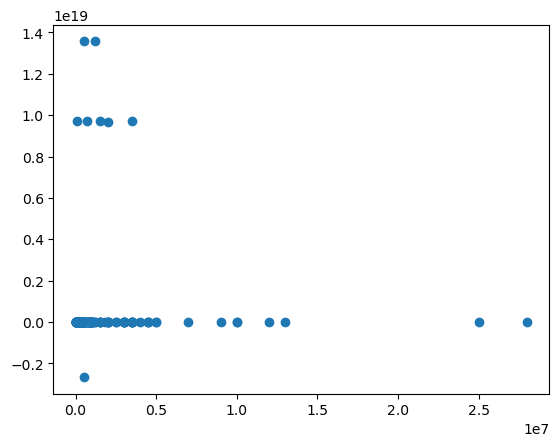

In [127]:
plt.scatter(Real_Values,predictions); 


In [ ]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution
